# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

the selected dataset is Medical Appointment No Shows which contains collected information from 100k medical appointments in Brazil. this dataset include number of patiants' characteristics that may or may not effect on whather the patiant will show up for the appointment or not. 

### Columns Description

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female.
* AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
* ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
* Age: How old is the patient.
* Neighbourhood: Where the appointment takes place.
* Scholarship: True of False . Observation, this is a broad   topic, consider reading this article 
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient.
* No-show: True or False.

For more detailsm refer to :[kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

### Question(s) for Analysis
- Q1: what is the percentage of no show petiants
- Q2: what is the paitent percentage of each attribute that did not show at the appointment
- Q3: Does the healthcare covarage effect on attending the appointments?  
- Q4: The effect of receiving reminder SMS on attending the appointments  
- Q5: Does the waiting durantion effect in attending the appointment 
- Q6: Does the age group effect on attending the appointments  
- Q7: Does the location of medical facility effect on attending the appointment 

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [122]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties
generally from the aalysis below at this section, this dataset for no show appointment incude 110527 row and 14 column.

***AGE***

 the avarage of patients age is 37 years old and most of them between 18 and 55 years old.the babies with less than 1 year are the most frequent petiants at this dataset. Moreover,it was found that 65% of the patients are Female while 35% are men.

***NO-SHOW***

 the majorty of the record at this dataset are for patient who did not show it their appointment.
 
***PatientId***

 there are 62299 paatients id at this dataset.

***Neighbourhood***

 the dataset include 81 different neighbourhood which the healthcare facilities are located at.

***scolarship***

 the dataset indicates that the vast majority of the patients does not have healthcare covarage program.
 
***other attributes***

the dataset indicates that the  majority of the patients does not have Hipertension, Diabetes, Alcoholism or even Handicap
 

In [123]:
#load the selected dataset file
df= pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

In [124]:
#display a sample of the dataset 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [125]:
df.shape

(110527, 14)

This dataset incude 110527 row and 14 column 

In [126]:
# get the information about each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [127]:
#get the number of null values for each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [128]:
#get the number of duplicated row in the dataset 
df.duplicated().sum()

0

The dataset has no null values or duplicated rows 

In [129]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### check the enterd values for each caracteristicas:

In [130]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

There is no unexpected value in this column

In [131]:
#get the percentage of each value
df.Gender.value_counts(normalize=True)

F    0.649977
M    0.350023
Name: Gender, dtype: float64

There is no unexpected value in this column

In [132]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

There is no unexpected value in this column

In [133]:
#get the percentage of each value
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

There is no unexpected value in this column

In [134]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

There is no unexpected value in this column

In [135]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

There is no unexpected value in this column

In [136]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

There is no unexpected value in this column

In [137]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

**There is unexpected value in this column**. the values should be boolean whether true-entered as 1- or false -entered as 2-

In [138]:
df['SMS_received'].value_counts(normalize=True)

0    0.678974
1    0.321026
Name: SMS_received, dtype: float64

There is no unexpected value in this column

In [139]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [140]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

scice there is alot of records with an age of 0 that might interpert as babaies that have les that a year old.

also **there is an uxpected** record of -1 years old!. 

In [141]:
df.Age.mode()

0    0
dtype: int64

In [142]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [143]:
df['Neighbourhood'].nunique()

81

In [144]:
df['PatientId'].nunique()

62299


### Data Cleaning

As per in the previous section above, the data cleaning will include the following processes:

- lowercase all the colums tiltles for consistency purpose
- drop the unnecessary column which are not effect on the analysis 
- drop the outliers at Age column 
- rename no-show name as per recommended
- drop the rows with unexpected value at Handcap column 


**-lowercase all the colums tiltles for consistency purpose**

In [145]:
#lowercase all the colums tiltles
df.columns=df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [146]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


***-drop the unnecessary column which are not effect on the analysis***

***appointmentid*** is unnecessary columns for the analysis becuse they are just keys or identifier for each row at the dataset 

In [147]:
df.drop(["appointmentid"],axis=1 ,inplace=True)

In [148]:
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


***- drop the outliers at "age" column***

In [149]:
#display the row with age less than zero 
df.query("age < 0")

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [150]:
df = df[df["age"] >= 0]

In [151]:
# check 
df.query("age < 0")

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


In [152]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

for column age we removed the values with -1 becuse it is not logically accepted while the max age as per stated above at this dataset is 115 years old which is acceptable.

***-rename the columns as per recommended***

In [153]:
df.rename(columns={'no-show': 'no_show','appointmentday':'appointment_day','scheduledday':'scheduled_day'},inplace=True)

In [154]:
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


***-drop the rows with unexpected value at Handcap column***

In [155]:
df["handcap"].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

the handcap column can take only binary value 0 or 1 which are represent False or True, these values indicate wheater the patient is handicap or not. thus, any other values are meaningless and should be dropped from the dataset.


In [156]:
#drop the record with handcap value greater than 1
df.drop(df[df["handcap"]>= 2].index,inplace=True)

In [157]:
#checking
df.query("handcap >= 2").count()

patientid          0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
no_show            0
dtype: int64

***-change data type format to a proper type***

In order to obtain the number of days that the patient waited until the appiontment time,the format for appointment_day and scheduled_day should be change it to datetime date only.

waiting_days is the duaration that paitent waited from the booking appointment day to the day of the apointment

In [158]:
#change the date from string to datetime format
df["scheduled_day"]= pd.to_datetime(df["scheduled_day"]).dt.date

In [159]:
df["appointment_day"]= pd.to_datetime(df["appointment_day"]).dt.date

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 13 columns):
patientid          110327 non-null float64
gender             110327 non-null object
scheduled_day      110327 non-null object
appointment_day    110327 non-null object
age                110327 non-null int64
neighbourhood      110327 non-null object
scholarship        110327 non-null int64
hipertension       110327 non-null int64
diabetes           110327 non-null int64
alcoholism         110327 non-null int64
handcap            110327 non-null int64
sms_received       110327 non-null int64
no_show            110327 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


In [161]:
# create waitig_days column by calculate the difference between the appointment date and the schaduled date
df["waiting_days"]=(df["appointment_day"]-df["scheduled_day"]).dt.days

this [Reference](https://www.w3resource.com/python-exercises/pandas/datetime/pandas-datetime-exercise-12.php) for convert  datetime format

In [162]:
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


***-categorizing the waiting_days***



In [163]:
#get the trends for the waiting days 
df['waiting_days'].value_counts()[:10].sort_values(ascending=False)

0     38485
2      6712
4      5279
1      5204
7      4904
6      4028
5      3266
14     2906
3      2730
8      2328
Name: waiting_days, dtype: int64

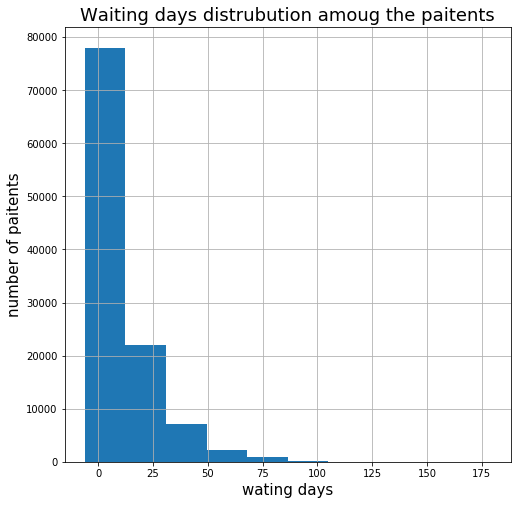

In [164]:
df["waiting_days"].hist(figsize=(8,8))
plt.xlabel("wating days",fontsize=15)
plt.ylabel("number of paitents",fontsize=15)
plt.title("Waiting days distrubution amoug the paitents",fontsize=18);

In [165]:
df["waiting_days"].describe()

count    110327.000000
mean         10.186971
std          15.257836
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

* based on the description above,there is negative waiting days should be dropped. also the distrubution shows the vast majorty of the patients waited less than a week for their appointment and big bulk of them booked thier appointment at the same day with no witing days to just 

In [166]:
#drop the record of waiting days value is negative
df.drop(df[df["waiting_days"]< 0].index,inplace=True)

In [167]:
#check
df.query('waiting_days < 0').count()

patientid          0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
no_show            0
waiting_days       0
dtype: int64

##### waiting categories are classified to 
* ***non*** those who have thier appointment at the same day of booking.
* ***1 week:*** for waiting from day up to 7 days.
* ***2 week:*** for waiting from 8 day up to 14 days.
* ***3 week:*** for waiting from 15 day up to 22 days.
* ***4 week:*** for waiting from 23 day up to 30 days.
* ***month+:*** for waiting more than 30 days 

In [168]:
ranges=[0,1,8,15,23,31,180]
labels=['non','1 week','2 week','3 week','4 week','month+']
df['wait_class']=pd.cut(df['waiting_days'],bins=ranges, labels=labels,right=False)
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,wait_class
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,non
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,non
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,non
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,non
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,non


***-categorizing the patients age ***
* ***infant:*** baby patient of age up to 1 year old
* ***kid:*** patient of age from 2 to 12 years
* ***youth:*** patient of age from 13 to 25 years
* ***adult:*** patient of age from 26 to 60 years
* ***senior:*** patient of age more than 60 years

In [169]:
ranges=[0,2,13,26,61,120]
labels=['infant','kid','youth','adult','senior']
df['age_group']=pd.cut(df['age'],bins=ranges, labels=labels,right=False)
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,wait_class,age_group
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,non,senior
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,non,adult
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,non,senior
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,non,kid
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,non,adult


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the percentage of no show petiants)

In [170]:
print(df.no_show.value_counts(),df.no_show.value_counts().sum())

No     88049
Yes    22273
Name: no_show, dtype: int64 110322


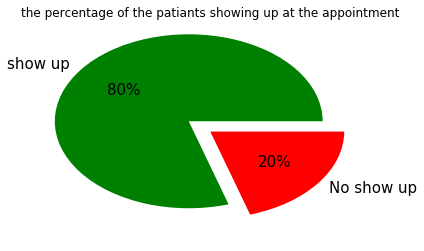

In [171]:
#plot a pie chrt to demonstrate the percantage of the patients who show up and did not show up at their appointments

label=["show up", "No show up"]
num=[88049,22278]
colors= ["green","red"]
plt.title("the percentage of the patiants showing up at the appointment")         
plt.pie(num,labels=label,explode=(0.2, 0),colors=colors, autopct='%.f%%',textprops={'fontsize': 15});

### Q2 what is the paitent percentage of each attribute that did not show at the appointment

In [172]:
def grby(col1,col2):
    x=df.groupby(col1)[col2].value_counts(normalize=True)
    return x

In [173]:
scholarship_plt= grby("no_show","scholarship")
scholarship_plt

no_show  scholarship
No       0              0.906120
         1              0.093880
Yes      0              0.884299
         1              0.115701
Name: scholarship, dtype: float64

In [174]:
hipertension_plt=grby("no_show","hipertension")
hipertension_plt

no_show  hipertension
No       0               0.795932
         1               0.204068
Yes      0               0.831725
         1               0.168275
Name: hipertension, dtype: float64

In [175]:
diabetes_plt=grby("no_show","diabetes")
diabetes_plt

no_show  diabetes
No       0           0.926427
         1           0.073573
Yes      0           0.936156
         1           0.063844
Name: diabetes, dtype: float64

In [176]:
alcoholism_plt=grby("no_show","alcoholism")
alcoholism_plt

no_show  alcoholism
No       0             0.969596
         1             0.030404
Yes      0             0.969694
         1             0.030306
Name: alcoholism, dtype: float64

In [177]:
handcap_plt=grby("no_show","handcap")
handcap_plt

no_show  handcap
No       0          0.980965
         1          0.019035
Yes      0          0.983657
         1          0.016343
Name: handcap, dtype: float64

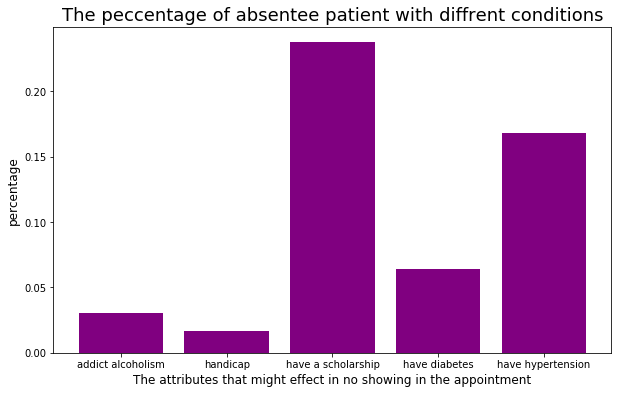

In [182]:
label =["handicap","addict alcoholism","have diabetes","have hypertension","have a scholarship"]
values=[handcap_plt[-1],alcoholism_plt[-1],diabetes_plt[-1],hipertension_plt[-1],scholarship_plt[-1]]
plt.figure(figsize=(10, 6))
plt.bar(label, values, color ='purple')
plt.xlabel("The attributes that might effect in no showing in the appointment",fontsize=12)
plt.ylabel("percentage",fontsize=12)
plt.title("The peccentage of absentee patient with diffrent conditions",fontsize=18)
plt.show()

#### findings 

- the analysis shows that the percentage of the paitent who did not show up to their appointment around 17% of them having a hypertension condition, and 6% of them are having diabetes and less than 2% of them are handicap and 3% of them are addicted to alcohlism and finally 12% of them does not having healtcare covarge

- the hypertension condition have the hieghestimpact on no showing at the appoitment compared with other conditions


### Research Question 3  (Does the healthcare covarage effect on attending the appointments?  )

In [193]:
scholarship_plt=grby("scholarship","no_show")
scholarship_plt

scholarship  no_show
0            No         0.802008
             Yes        0.197992
1            No         0.762335
             Yes        0.237665
Name: no_show, dtype: float64

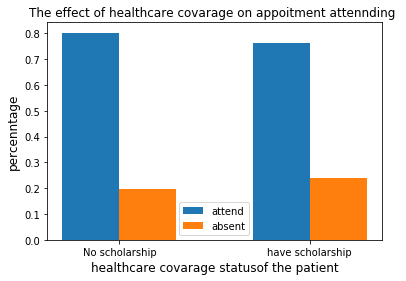

In [194]:
label =["No scholarship","have scholarship" ]
presentee =[0.802008, 0.762335] 
absentee = [0.197992, 0.237665]

w = 0.3  
bar1= np.arange(len(label)) 
bar2=[i+w for i in bar1]
plt.bar(bar1, presentee, w, label='attend')
plt.bar(bar2, absentee, w, label='absent')
plt.xlabel('healthcare covarage statusof the patient',fontsize=12)
plt.ylabel("percenntage",fontsize=12)
plt.title("The effect of healthcare covarage on appoitment attennding ",fontsize=12)
plt.xticks(bar1+w/2,label)
plt.legend()
plt.show();



the persentage of patients who did not show up at the appointment and having health covarage is 23.7% wihle those without health covarage is 19.7%

### Research Question 4 (The effect of receiving reminder SMS on attending the appointments  )

In [195]:
sms_plt=grby("no_show","sms_received")
sms_plt

no_show  sms_received
No       0               0.708571
         1               0.291429
Yes      0               0.561128
         1               0.438872
Name: sms_received, dtype: float64

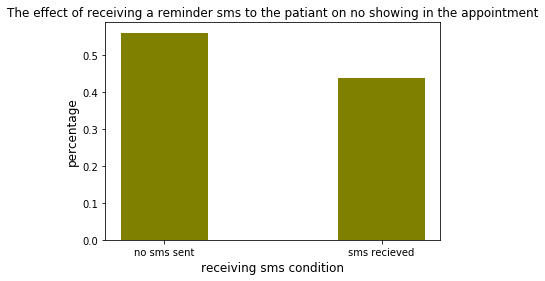

In [196]:
label =["no sms sent","sms recieved" ]
values=sms_plt[2:]
plt.bar(label, values,width=0.4, color =('olive'))
plt.xlabel("receiving sms condition",fontsize=12)
plt.ylabel("percentage",fontsize=12)
plt.title("The effect of receiving a reminder sms to the patiant on no showing in the appointment")
plt.show()

#### findings 
those how did not showed up for their appointment 56% of them did not receive SMS before there appointment  

### Q5: Does the waiting durantion effect in attending the appointment ?

In [197]:
#get the percentage of no show paitent based onn the waiting duration 
d=grby("wait_class","no_show")
d

wait_class  no_show
non         No         0.953540
            Yes        0.046460
1 week      No         0.758584
            Yes        0.241416
2 week      No         0.695037
            Yes        0.304963
3 week      No         0.675309
            Yes        0.324691
4 week      No         0.672548
            Yes        0.327452
month+      No         0.670300
            Yes        0.329700
Name: no_show, dtype: float64

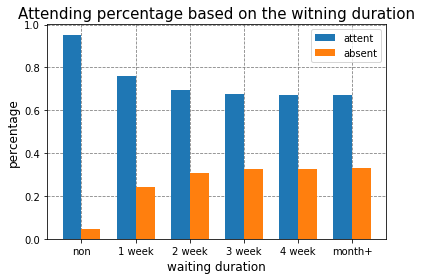

In [200]:
#plot the finding
labels = ['non', '1 week', '2 week', '3 week', '4 week','month+']
presentee =[d[0], d[2], d[4], d[6], d[8], d[10]]
absentee = [d[1], d[3], d[5], d[7], d[9], d[11]]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
show = ax.bar(x - width/2, presentee, width, label='attent')
no_show = ax.bar(x + width/2, absentee, width, label='absent')

ax.set_xlabel('waiting duration',fontsize=12)
ax.set_ylabel('percentage',fontsize=12)
ax.set_title('Attending percentage based on the witning duration',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.grid(zorder=0)
fig.tight_layout()
plt.show();


* findings:

    the patients who have their appointmet at the same day the booked it, the vast majority of them tend to attend their 
    appointment with only 5% of no show up. this percentage increase to about 25% of no show if the waiting duration is up         to a week. 
    
    while the paitents who waited more than a week (for classes 2 week,3 week,4 week, month+ ) the percentage of no show at         the appointmet increased around 30% to 33%

***count the percentage of patient for each waiting duration class***

In [201]:
d_2=grby("no_show","wait_class")
d_2

no_show  wait_class
No       non           0.416779
         1 week        0.276755
         2 week        0.094788
         month+        0.078922
         3 week        0.076912
         4 week        0.055844
Yes      1 week        0.348179
         2 week        0.164414
         month+        0.153459
         3 week        0.146186
         4 week        0.107484
         non           0.080277
Name: wait_class, dtype: float64

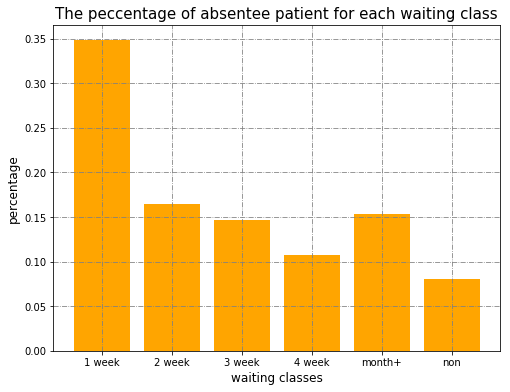

In [203]:
label =["1 week","2 week","month+","3 week","4 week", "non"]
values=d_2[6:]
plt.figure(figsize=(8, 6))
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "-.")
plt.bar(label, values, color ='orange')
plt.xlabel("waiting classes",fontsize = 12)
plt.ylabel('percentage',fontsize = 12)
plt.title("The peccentage of absentee patient for each waiting class",fontsize = 15)

plt.show()

the graph show that the number of paitent who waited up to a week is the hieghest number compared with other categorey. it is about double the number of other classes 

### Research Question 6 (Does the age group effect on attending the appointments  )

In [102]:
# get the percentage of each age group who did not showed up normalize=True 
d_5=grby("no_show","age_group")
d_5

no_show  age_group
No       adult        0.472612
         senior       0.189701
         youth        0.147884
         kid          0.135765
         infant       0.054038
Yes      adult        0.470480
         youth        0.202308
         kid          0.145782
         senior       0.134109
         infant       0.047322
Name: age_group, dtype: float64

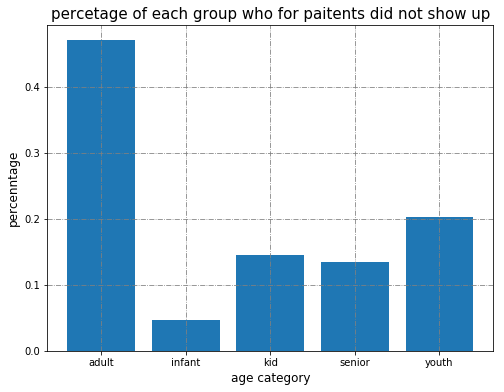

In [204]:
#plot the findings 
labels = ['adult', 'youth','kid', 'senior', 'infant']
values= d_5[5:]
plt.figure(figsize=(8, 6))
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "-.")
plt.bar(labels, values)
plt.xlabel('age category',fontsize = 12)
plt.ylabel('percenntage',fontsize = 12)
plt.title("percetage of each group who for paitents did not show up",fontsize = 15)
plt.show()

- the analysis above showed the percentage of paitent who did not showed up to their appointment based on their age group. it was found that 47% of the nno showed paitent are adult, 20.2% are youth, 14.6% are kid, 13.4% senior and 4.7% are infant

In [205]:
#get the percantage of attend ad no showing for each age group
d=grby("age_group","no_show")
d

age_group  no_show
infant     No         0.818651
           Yes        0.181349
kid        No         0.786396
           Yes        0.213604
youth      No         0.742911
           Yes        0.257089
adult      No         0.798837
           Yes        0.201163
senior     No         0.848299
           Yes        0.151701
Name: no_show, dtype: float64

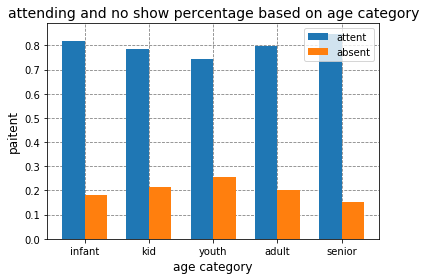

In [206]:
#plot the findings
labels = ['infant', 'kid','youth', 'adult', 'senior']
presentee =[d[0], d[2], d[4], d[6], d[8]]
absentee = [d[1], d[3], d[5], d[7], d[9]]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
show = ax.bar(x - width/2, presentee, width, label='attent')
no_show = ax.bar(x + width/2, absentee, width, label='absent')

ax.set_xlabel('age category',fontsize = 12)
ax.set_ylabel('paitent',fontsize = 12)
ax.set_title('attending and no show percentage based on age category',fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.grid(zorder=0)
fig.tight_layout()
plt.show();


- the analysis above showed the percentage of presentee and absentee for each of age groups, it was foud that  youth group have the hieghest percenntage of no show of 25.7% then kids with 21.3% and the lowest percentage of no show was in senior group with percentage of 15.2% 

### Q7: Does the location of medical facility effect on attending the appointment 

In [207]:
#get the most visited medical facility
d=df["neighbourhood"].value_counts().sort_values(ascending=False)
d[:10]

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4419
JARDIM DA PENHA      3872
ITARARÉ              3507
CENTRO               3330
TABUAZEIRO           3126
SANTA MARTHA         3113
JESUS DE NAZARETH    2853
BONFIM               2770
Name: neighbourhood, dtype: int64

In [208]:
#create df contain nno show record only 
noshow=df.query("no_show =='Yes'")

#get the top 10 neighbourhood having no show patient
plt_4=noshow["neighbourhood"].value_counts().sort_values(ascending=False)
plt_4[:10]

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               921
RESISTÊNCIA           902
CENTRO                701
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             590
TABUAZEIRO            572
BONFIM                549
Name: neighbourhood, dtype: int64

the analysis shows that JARDIM CAMBURI neighbourhood have the highest number of visitor paitent as well as the highest number of paitent who did not showed up to their appointment. 

#### Get the percentage of no show for each neighbourhood:

In [209]:

#create list of neighbourhoods
hoods= df["neighbourhood"].unique()
new_list = []

#count the number of appoinntments at each neighbourhood
for hood in hoods:
    q = 'neighbourhood  == "' + hood + '"'
    num_appts = len(df.query(q))
#count the number of appoinntments the paitent did not showed up for each neighbourhood
    q1 = 'neighbourhood  == "' + hood + '" & no_show == "Yes"'
    no_show_appts = len(df.query(q1))

    new_list.append([hood, num_appts, no_show_appts])
#create df neme "z" and store the queries above    
z = pd.DataFrame(new_list, columns=["neighbourhood", "num_app", "no_show"])
#add the percentage of no show for each neighbourhood
z["per_of_noshow"]=(z["no_show"]/z["num_app"])*100

hood_sort=z.sort_values(by=["per_of_noshow"],ascending=False)
#list of top 10 neighbourhood that have hieghest percentage of no show 
hood_sort.head(10)

,neighbourhood,num_app,no_show,per_of_noshow
79,ILHAS OCEÂNICAS DE TRINDADE,2,2,100.000000
43,SANTOS DUMONT,1274,369,28.963893
68,SANTA CECÍLIA,448,123,27.455357
39,SANTA CLARA,505,134,26.534653
34,ITARARÉ,3507,921,26.261762
62,JESUS DE NAZARETH,2853,696,24.395373
73,HORTO,175,42,24.000000
65,ILHA DO PRÍNCIPE,2259,526,23.284639
5,ANDORINHAS,2255,520,23.059867
44,CARATOÍRA,2564,590,23.010920


 - Reminder the general percentage of no show for this datasent is 20.6%, let's analyze the neighbourhood with percentage higher than 20% and get the top 10 

In [210]:
q_3=hood_sort.query("per_of_noshow >21").sort_values(by=["per_of_noshow"],ascending=False)
q_3


,neighbourhood,num_app,no_show,per_of_noshow
79,ILHAS OCEÂNICAS DE TRINDADE,2,2,100.000000
43,SANTOS DUMONT,1274,369,28.963893
68,SANTA CECÍLIA,448,123,27.455357
39,SANTA CLARA,505,134,26.534653
34,ITARARÉ,3507,921,26.261762
62,JESUS DE NAZARETH,2853,696,24.395373
73,HORTO,175,42,24.000000
65,ILHA DO PRÍNCIPE,2259,526,23.284639
5,ANDORINHAS,2255,520,23.059867
44,CARATOÍRA,2564,590,23.010920


- findings:
for the appointments in medical facility lacated at the list of neighbourhood above the paitent have higher percentage of no show compared with the avarage percantage

In [211]:
len(q_3)

28

from 81 neighbourhood that the medical facility located in, 28 of them have percentage of no show more than 20% as it the general no show avarage

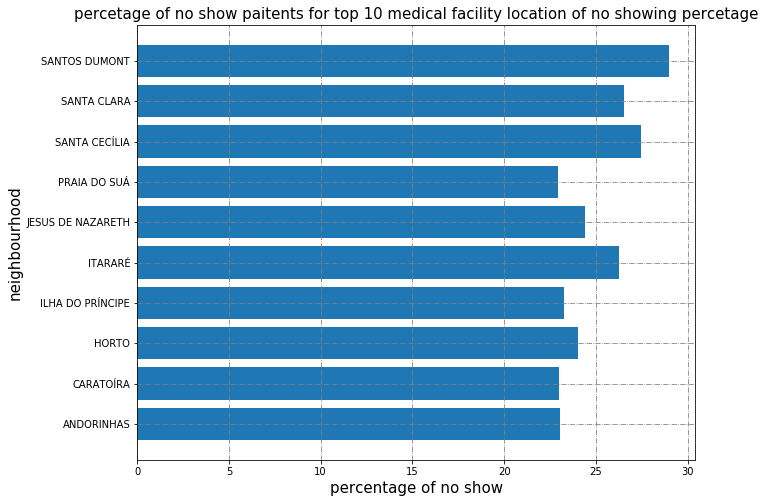

In [212]:
#plot the top 10 neighbourhoods having percentage of no show 

hood_sort_plt =q_3[1:11]# drop ILHAS OCEÂNICAS DE TRINDADE neighbourhood where only 2 appointments took place

labels = hood_sort_plt["neighbourhood"]
values= hood_sort_plt["per_of_noshow"]
plt.figure(figsize=(10, 8))
plt.grid(True, color = "grey", linewidth = ".8", linestyle = "-.")
plt.barh(labels, values)
plt.xlabel('percentage of no show',fontsize = 15)
plt.ylabel('neighbourhood',fontsize = 15)
plt.title("percetage of no show paitents for top 10 medical facility location of no showing percetage",fontsize = 15);


<a id='conclusions'></a>
## Conclusions

- The percentage of paitents who did nnot attent their appoitment is 20%
- the paitent who did not show up to their appointment:
  * 17% of them with hypertension condition
  * 12% of them does not having healtcare covarge
  * 6% of them with diabetes condition

- 23.7%  of patients who have a health covarage did not show up at the appointment wihle 19.7% of patients who did not have a health covarage did not show up at the appointment

- the patients who have their appointmet at the same day the booked it, the vast majority of them tend to attend their appointment with only 5% of no show up. this percentage increase to about 25% of no show if the waiting duration is up to a week.

- youth group have the hieghest percenntage of no show of 25.7% then kids with 21.3% and the lowest percentage of no show was in senior group with percentage of 15.2%

- JARDIM CAMBURI neighbourhood have the highest number of visitor paitent as well as the highest number of paitent who did not showed up to their appointment.

- from 81 neighbourhood that the medical facility located in, 28 of them have percentage of no show more than 20% as it the general no show avarage 


#### limitations

- incorrect intered data from the source - medical facility receptiont- like the categorize the hadicap condition,
- all the appointments time is set as date without specifying the appintment time specifically as per booked by the patient
  


In [213]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0